<a href="https://colab.research.google.com/github/hardsoft-maker/Theoretical_Mechanics/blob/main/HW3_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from dataclasses import dataclass
from typing import List
import numpy as np
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
import math
FPS = 30  # increase to make animation slower
t_start = 0
t_end = 3
frames = int((t_end - t_start) * FPS)
phi_start = 0
def time(t):
    return  t/FPS


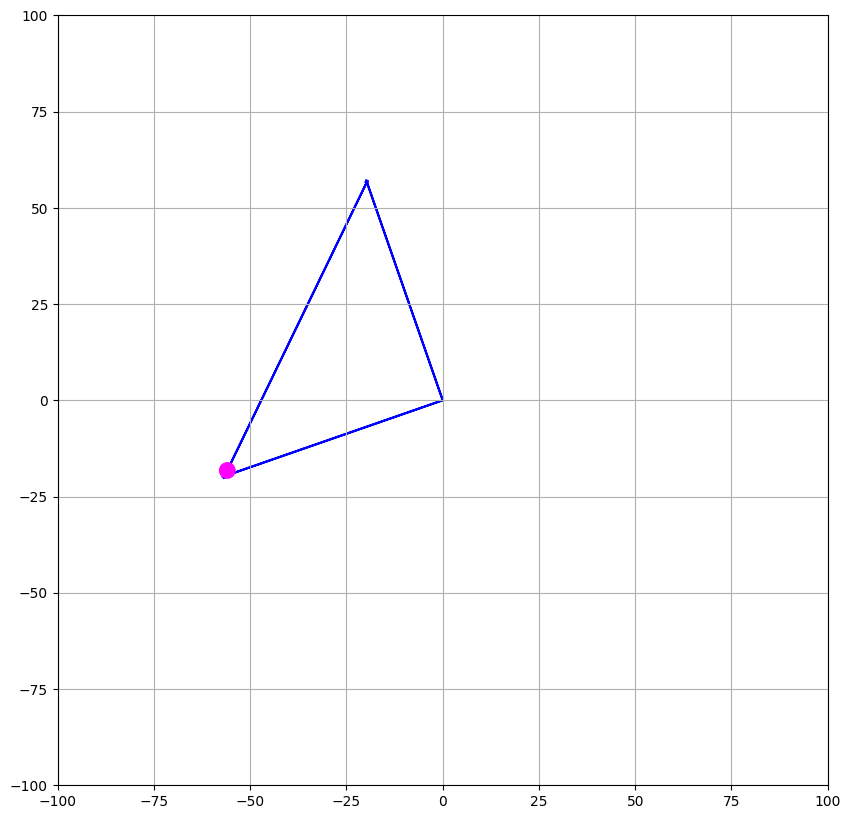

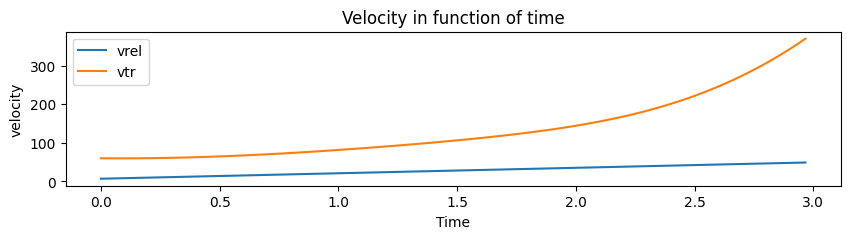

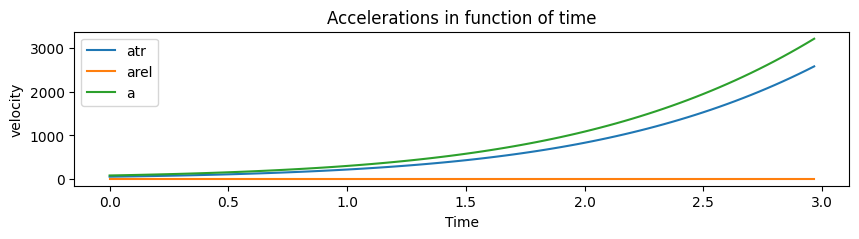

In [ ]:
vrel_values = []
vtr_values = []
atr_values = []
arel_values = []
acor_values = []
a_values = []
time_values = []

@dataclass
class SystemTrace:
    time: float
    @property
    def phi(self):
      return 0.2*(self.time*self.time*self.time) + self.time
    @property
    def opos(self):
      phi = self.phi
      return np.array(
          [
              60*math.cos(phi),
              60*math.sin(phi),
          ]
      )
    @property
    def apos(self):
      phi = self.phi
      return np.array(
          [
              60*math.cos(phi + np.pi/2),
              60*math.sin(phi + np.pi/2),
          ]
      )
    @property
    def mpos(self):
      phi=self.phi
      o=self.opos
      OM = 5*math.sqrt(2)*(self.time**2 + self.time)
      return np.array(
          [
              OM*np.cos(np.deg2rad(135) + phi) + o[0],
              OM*np.sin(np.deg2rad(135) + phi) + o[1],
          ]
      )

traces: List[SystemTrace] = []
fig, ax = plt.subplots(figsize=(10, 10))
fig2, ax2 = plt.subplots(figsize=(10, 2))
fig3, ax3 = plt.subplots(figsize=(10, 2))

def update_static_plot():
    global vrel_values, vtr_values, atr_values, arel_values, time_values, acor_values, a_values
    latest_trace = traces[-1]
    w= 0.6*(latest_trace.time**2) + 1
    ss = 5*math.sqrt(2)*(latest_trace.time**2 + latest_trace.time)
    vrel = 5*math.sqrt(2)*(2*latest_trace.time + 1)
    vtr = w*math.sqrt(60**2 + ss**2 - 2*60*ss*math.cos(np.deg2rad(45)))
    atr =  70*latest_trace.time + 60*(w**2)
    arel = 10*math.sqrt(2)
    acor = 2*w*vrel
    vrel_values.append(vrel)
    vtr_values.append(vtr)
    atr_values.append(atr)
    arel_values.append(arel)
    a_values.append(arel + atr + acor)
    #acor_values.append(acor)
    time_values.append(latest_trace.time)
    ax2.clear()
    ax3.clear()
    ax2.plot(time_values, vrel_values, label='vrel')
    ax2.plot(time_values, vtr_values, label='vtr')
    ax3.plot(time_values, atr_values, label='atr')
    ax3.plot(time_values, arel_values, label='arel')
    ax3.plot(time_values, a_values, label='a')
    #ax2.plot(time_values, acor_values, label='acor')
    ax2.set_title('Velocity in function of time')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('velocity')
    ax2.legend()

    ax3.set_title('Accelerations in function of time')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('velocity')
    ax3.legend()
ax.set(xlim=(-100, 100), ylim=(-100, 100))
ax.set_aspect("equal")
ax.grid()

ax2.set_title('Velocity in function of time')
ax2.set_xlabel('Time')
ax2.set_ylabel('acceleration')
ax2.legend()
p = SystemTrace(0)
point_O1A = ax.arrow(
    0,
    0,
    p.apos[0],
    p.apos[1],
    head_width=0.9,
    head_length=0.5,
    color="b",
    lw=1.5,
)
point_O1O = ax.arrow(
    0,
    0,
    p.apos[0],
    p.apos[1],
    head_width=0.9,
    head_length=0.5,
    color="b",
    lw=1.5,
)
point_AO = ax.arrow(
    p.opos[0],
    p.opos[1],
    p.apos[0]-p.opos[0],
    p.apos[1]-p.opos[1],
    head_width=0.9,
    head_length=0.5,
    color="b",
    lw=1.5,
)
point_M = patches.Circle((p.mpos[0], p.mpos[1]), 2, color='magenta',label='M')
ax.add_patch(point_M)
vrel_line, = ax2.plot([], [], label='vrel')
vtr_line, = ax2.plot([], [], label='vtr')
atr_line, = ax2.plot([], [], label='atr')
arel_line, = ax2.plot([], [], label='arel')
def animate(i):
    angle = time(i)
    traces.append(SystemTrace(angle))
    p = traces[-1]
    update_static_plot()
    point_O1A.set_data(x=0, dx=p.apos[0], y=0, dy=p.apos[1])
    point_O1O.set_data(x=0,y=0,dx=p.opos[0],dy=p.opos[1])
    point_AO.set_data(x=p.opos[0],y=p.opos[1],dx=(p.apos[0]-p.opos[0]),dy=(p.apos[1]-p.opos[1]))
    point_M.center = (p.mpos[0],p.mpos[1])

anim = FuncAnimation(fig, animate, interval=1, frames=frames)
plt.legend()
anim.save("motion_task1.gif")
plt.draw()
plt.show()